In [1]:
import pandas as pd
%matplotlib inline
import datetime
import json
import tldextract
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
with open("BrowserHistory.json") as f:
    data = json.loads(f.read())
    df = pd.DataFrame(data["Browser History"])

In [3]:
df.drop('client_id', axis=1, inplace=True)
df.drop('favicon_url', axis=1, inplace=True)
df.sample(1)

,page_transition,title,url,time_usec
15275,RELOAD,Flutter Series - Dart for Flutter - DEV Commun...,https://dev.to/tanweer919/flutter-series-dart-...,1609169426758338


In [4]:
def convert_time(x):
    return datetime.datetime.fromtimestamp(x/1000000)
df['dt'] = df['time_usec'].apply(convert_time)

In [5]:
def get_date(x):
    return str(x.date())
df['date'] = df['dt'].apply(get_date)

In [6]:
def get_hour(x):
    return int(x.hour)
df['hour'] = df['dt'].apply(get_hour)

In [7]:
def get_month(x):
    return int(x.month)
df['month'] = df['dt'].apply(get_month)

In [8]:
def get_is_secure(x):
    if x.startswith("https"):
        return "Y"
    return "N"
df['is_secure'] = df['url'].apply(get_is_secure)

In [9]:
def get_is_weekend(x):
    if x.weekday() >= 5:
        return "Y"
    return "N"
df['is_weekend'] = df['dt'].apply(get_is_weekend)

In [10]:
days_arr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def get_day_of_week(x):
    return days_arr[x.weekday()]
df['day_of_week'] = df['dt'].apply(get_day_of_week)

In [11]:
def get_domain(x):
    domain = tldextract.extract(x)[1]
    sub_domain = tldextract.extract(x)[0]
    if sub_domain == "mail":
        return sub_domain + "." + domain
    if domain == "google" and sub_domain=="www":
        return "google_search"
    return domain
df['domain'] = df['url'].apply(get_domain)

In [12]:
def get_category(x):
    if x in ['coursera', 'kaggle', 'edx']:
        return 'Learning'
    elif x in ['medium', 'hackernoon', 'analyticsvidyha']:
        return 'TechReads'
    elif x in ['facebook', 'twitter', 'quora', 'whatsapp']:
        return 'Social'
    elif x in ['stackoverflow', 'superuser']:
        return 'DOubts'
    elif x in ['mail.google', 'slack.com']:
        return 'Email'
    elif x in ['google_search']:
        return 'Search'
    else:
        return 'Other'
df['category'] = df['domain'].apply(get_category)

In [13]:
df = df[(df['page_transition'] == 'LINK') | (df['page_transition'] == 'TYPED')]
df = df[df['domain'] != 'newtab']

<AxesSubplot:xlabel='month', ylabel='count'>

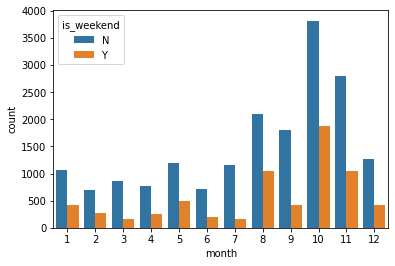

In [14]:
sns.countplot(x='month', hue = 'is_weekend', data = df)

<AxesSubplot:xlabel='hour', ylabel='count'>

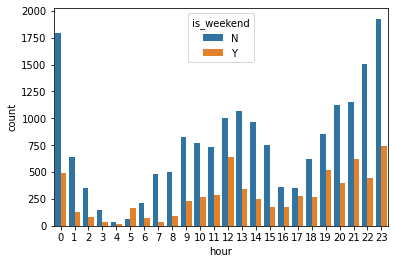

In [15]:
sns.countplot(x='hour', hue = 'is_weekend', data = df)

In [16]:
df_new = df[(df["month"] >= 11)].groupby(["hour", "date"])["domain"].nunique()
df_new = df_new.reset_index(name="count")

<AxesSubplot:xlabel='date', ylabel='hour'>

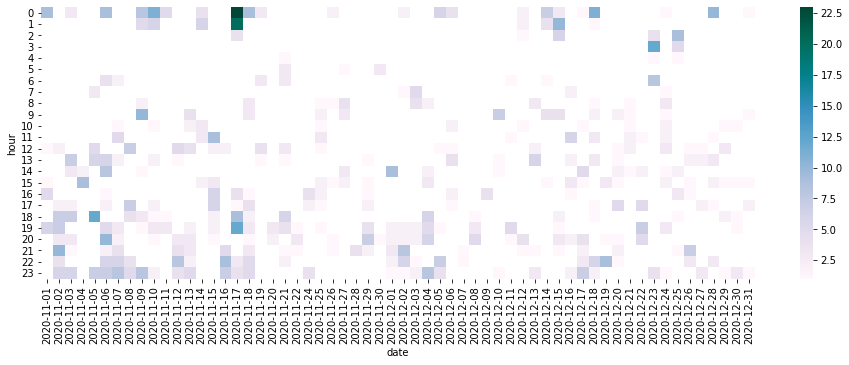

In [17]:
plt.figure(figsize = (16,5))
sns.heatmap(df_new.pivot("hour", "date", "count"), annot=False, cmap="PuBuGn")

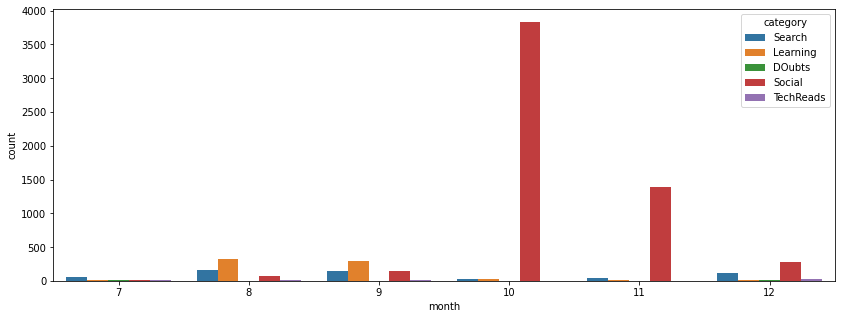

In [18]:
plt.figure(figsize = (14,5))
sns.countplot(x="month", hue="category", data=df[(df['month'] > 6) & (df["category"] != 'Other') & (df["category"] != 'Email')]);



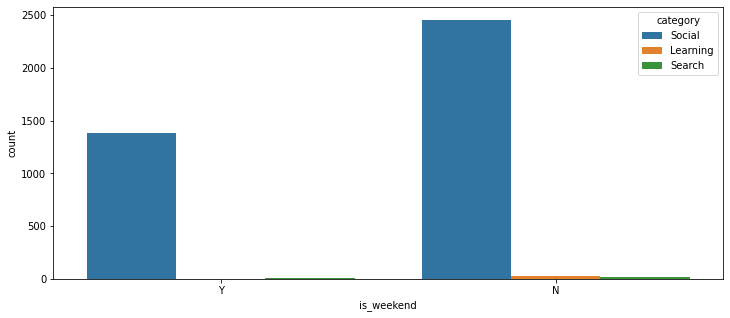

In [19]:
plt.figure(figsize = (12,5))
sns.countplot(x="is_weekend", hue="category", data=df[(df['month'] == 10) & (df["category"] != 'Other') & (df["category"] != 'Email')]);



In [20]:
df_heat = df.groupby(["hour", "day_of_week"])["domain"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day_of_week", "domain")

<AxesSubplot:xlabel='day_of_week', ylabel='hour'>

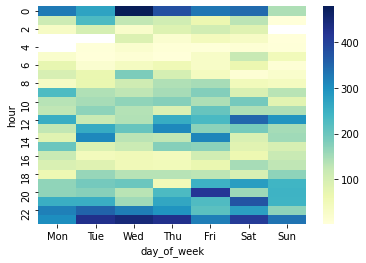

In [21]:
sns.heatmap(df_heat2[days_arr] , cmap="YlGnBu")


In [22]:
df_cat = df[(df["month"] >= 11)].groupby(["category", "day_of_week", "hour", "domain", "is_weekend"]).size().reset_index()


<AxesSubplot:xlabel='category', ylabel='hour'>

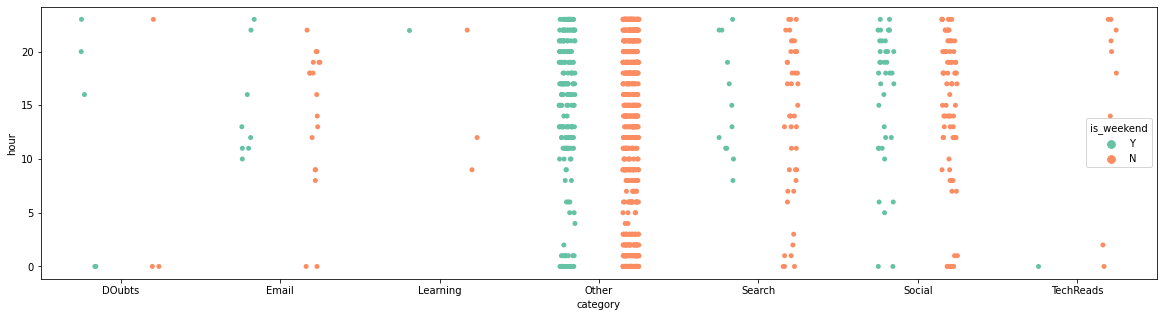

In [23]:
plt.figure(figsize = (20,5))
sns.stripplot(x="category", y="hour", hue="is_weekend",
                    data=df_cat, jitter=True, dodge=True,
                    palette="Set2")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c008865-ad85-4d37-b293-39c08006c595' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>